# MSDS689 - KMeans Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt 
from PIL import Image
%matplotlib inline
import seaborn as sns; sns.set()  # for plot styling
from sklearn.datasets.samples_generator import make_blobs

/Users/vaishnavikashyap/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


## What is KMeans?

Kmeans Clustering is an unsupervised machine learning technique that, simply put, groups similar data points together to discover underlying patterns. An unsupervised learning system is one in which users do not oversee the learning; instead, the model itself works with the unlabelled data to uncover patterns. In Kmeans, a "cluster" is a collection of data points grouped together by certain similarities; Kmeans looks for a fixed number of clusters in the dataset. 

The "K" in Kmeans refers to the number of centroids, or the location representing the center of the cluster, in the dataset. So, the algorithm identifies K number of centroids and then allocates every data point to the nearest cluster, while also trying to keep the centroids as small as possible. The "means" in Kmeans comes from taking the average of the data by finding the centroid.

## KMeans vs KMeans++

This project implements both Kmeans and Kmeans++. What is the difference? KMeans starts with allocating cluster centers randomly and then looks for "better" solutions, while KMeans++ starts with allocating one cluster center randomly and then searches for other centers given the first one. Both algorithms use random initialization as a starting point and can give different results on different runs. Ideally, they should give comparable results but this is still not guaranteed. Because KMeans++ centers are distributed over the data, it is more likely to have less cost associated with each cluster than random initialization. In summary, the 2 main differences between the algos have to do with the selection of the centroids around which the clustering takes place and kmeans++ not being dependent on initialization of centroid.

## Playing around with fake data

In [20]:
%run kmeans

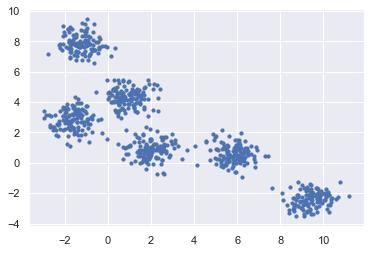

In [122]:
X, y = make_blobs(n_samples=750, centers=6, cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=10);

We can clearly see that there are 6 clusters here (centers = 6), but there are some data points where we can't immediately tell what cluster they belong to. How will kmeans group those points together?

In the plot below, I set centroids equal to None, so this code is doing regular KMeans and not KMeans++. 

### Regular Kmeans

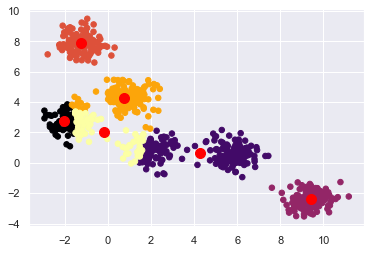

In [123]:
centroids, clusters = kmeans(X, k=6, centroids=None)
rows = []
for cluster in clusters:
    for y in cluster:
        rows.append(y)
num_cluster = []
for cluster_idx, indexes in enumerate(clusters):
    for index in indexes:
        num_cluster.append(cluster_idx)
plt.scatter(X[rows, 0], X[rows, 1], c=num_cluster, s=30, cmap='inferno')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=1)
plt.show()

### Kmeans++

The plot below, on the other hand, is using Kmeans++.

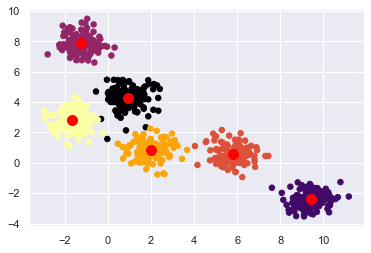

In [124]:
centroids, clusters = kmeans(X, k=6, centroids='kmeans++')
rows = []
for cluster in clusters:
    for y in cluster:
        rows.append(y)
num_cluster = []
for cluster_idx, indexes in enumerate(clusters):
    for index in indexes:
        num_cluster.append(cluster_idx)
plt.scatter(X[rows, 0], X[rows, 1], c=num_cluster, s=30, cmap='inferno')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=100, alpha=1)
plt.show()

In [46]:
print(centroids)

[[ 0.9351668   4.32253998]
 [ 9.40964595 -2.38599679]
 [ 5.80011162  0.59542605]
 [-1.2402617   7.86704493]
 [-1.62459117  2.82763658]
 [ 2.00159372  0.86721557]]


When running the kmeans algo, we can see that suspicious middle data points have been clustered based on distance from the applicable centroids. For example, at the 4 mark on the X-axis, the 2 purple and 2 orange points are respectively grouped because they are closer to those color centroids. There are differences between the plots generated by Kmeans and Kmeans. The results are comparable but we can see the centroids have been initialized differently.

If we ran the above code again, the colors per cluster would not be the same, so there is definitely randomness in the way kmeans selects clusters.

## Non Linear Data

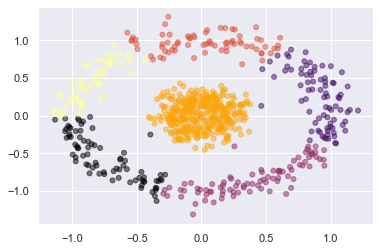

In [40]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=750, noise=0.1, factor=.2, random_state=0)
centroids, clusters = kmeans(X, k=6, centroids='kmeans++')
rows = []
for cluster in clusters:
    for y in cluster:
        rows.append(y)
num_cluster = []
for cluster_idx, indexes in enumerate(clusters):
    for index in indexes:
        num_cluster.append(cluster_idx)
plt.scatter(X[rows, 0], X[rows, 1], c=num_cluster, s=25, alpha=0.5, cmap='inferno')
plt.show()

In [42]:
print(centroids)

[[-0.72957423 -0.56218943]
 [ 0.90475706  0.23573089]
 [ 0.39930146 -0.83692929]
 [ 0.03222218  0.96128137]
 [-0.00261941  0.01107006]
 [-0.84317282  0.44132712]]


Kmeans works for non-linear boundaries in a dataset as well. In the above graph, I took the "make circles" dataset and separated it into 6 clusters like linear dataset example. This grpah is interesting to me because there are 3 dots surrounding the yellow cluster that have been classified as black, light purple, and dark purple, instead of yellow like I would assume. 

### Setting k to 2

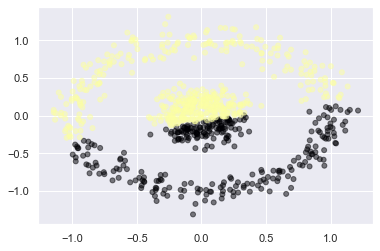

In [47]:
X, y = make_circles(n_samples=750, noise=0.1, factor=.2, random_state=0)
centroids, clusters = kmeans(X, k=2, centroids='kmeans++')
rows = []
for cluster in clusters:
    for y in cluster:
        rows.append(y)
num_cluster = []
for cluster_idx, indexes in enumerate(clusters):
    for index in indexes:
        num_cluster.append(cluster_idx)
plt.scatter(X[rows, 0], X[rows, 1], c=num_cluster, s=25, alpha=0.5, cmap='inferno')
plt.show()

K=2 sees the data being split pretty equally horizontally. 

## Application to Image Compression

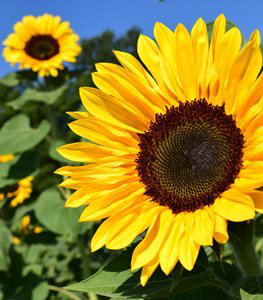

In [56]:
Image.open('Images/flower.jpeg')

Here is picture of a beautiful little sunflower. Let's play around with it. 

In [57]:
path = 'Images/flower.jpeg'
im = Image.open(path)
np_im = np.array(im)
print(np_im.shape)

(300, 263, 3)


In [65]:
im.height

300

In [58]:
np.max(np.max(np_im, axis=1), axis=0)

array([255, 255, 255], dtype=uint8)

Converting the color scale to gray scale (from 255 we change it to 0,1) to make transformations easier. We additionally need to do this in order to create a 2D array for the image.

In [59]:
rows = np_im.shape[0]
height = np_im.shape[1]
channels = np_im.shape[2]
data = np_im.reshape(height * width, channels) 
data.shape

(78900, 3)

Here I created an image with just the Red pixels (removed the blue and green) and 4 clusters, and compared it to the original image. 

In [120]:
k=4
centroids, clusters = kmeans(data, k=k, centroids='kmeans++')

Text(0.5, 1.0, 'Red Image')

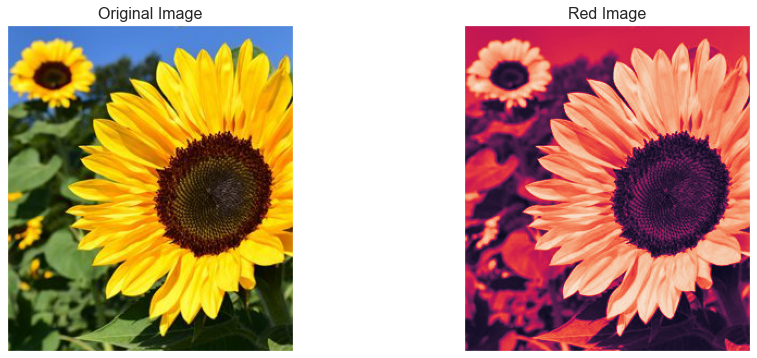

In [121]:
gray = data.copy()
for cluster_no, row_indexes in enumerate(clusters):
    new_colours[row_indexes, :] = centroids[cluster_no]
im_gray = gray.reshape(np_im.shape)
fig, ax = plt.subplots(1, 2, figsize=(16, 6), subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(im_gray)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(grayscale_array)
ax[1].set_title('Red Image', size=16)

### Playing around with different values of k

Here I compare different values of K and the images that are output. I tried my code on K=5, K=7, and K=12. 

In [104]:
centroids5, clusters5 = kmeans(data, k=5, centroids='kmeans++')
five_color = data.copy()
for cluster_no, row_indexes in enumerate(clusters5):
    five_color[row_indexes, :] = centroids5[cluster_no]
five = five_color.reshape(np_im.shape)

In [105]:
centroids7, clusters7 = kmeans(data, k=7, centroids='kmeans++')
seven_color = data.copy()
for cluster_no, row_indexes in enumerate(clusters7):
    seven_color[row_indexes, :] = centroids7[cluster_no]
seven = seven_color.reshape(np_im.shape)

In [106]:
centroids12, clusters12 = kmeans(data, k=12, centroids='kmeans++')
twelve_color = data.copy()
for cluster_no, row_indexes in enumerate(clusters12):
    twelve_color[row_indexes, :] = centroids12[cluster_no]
twelve = twelve_color.reshape(np_im.shape)

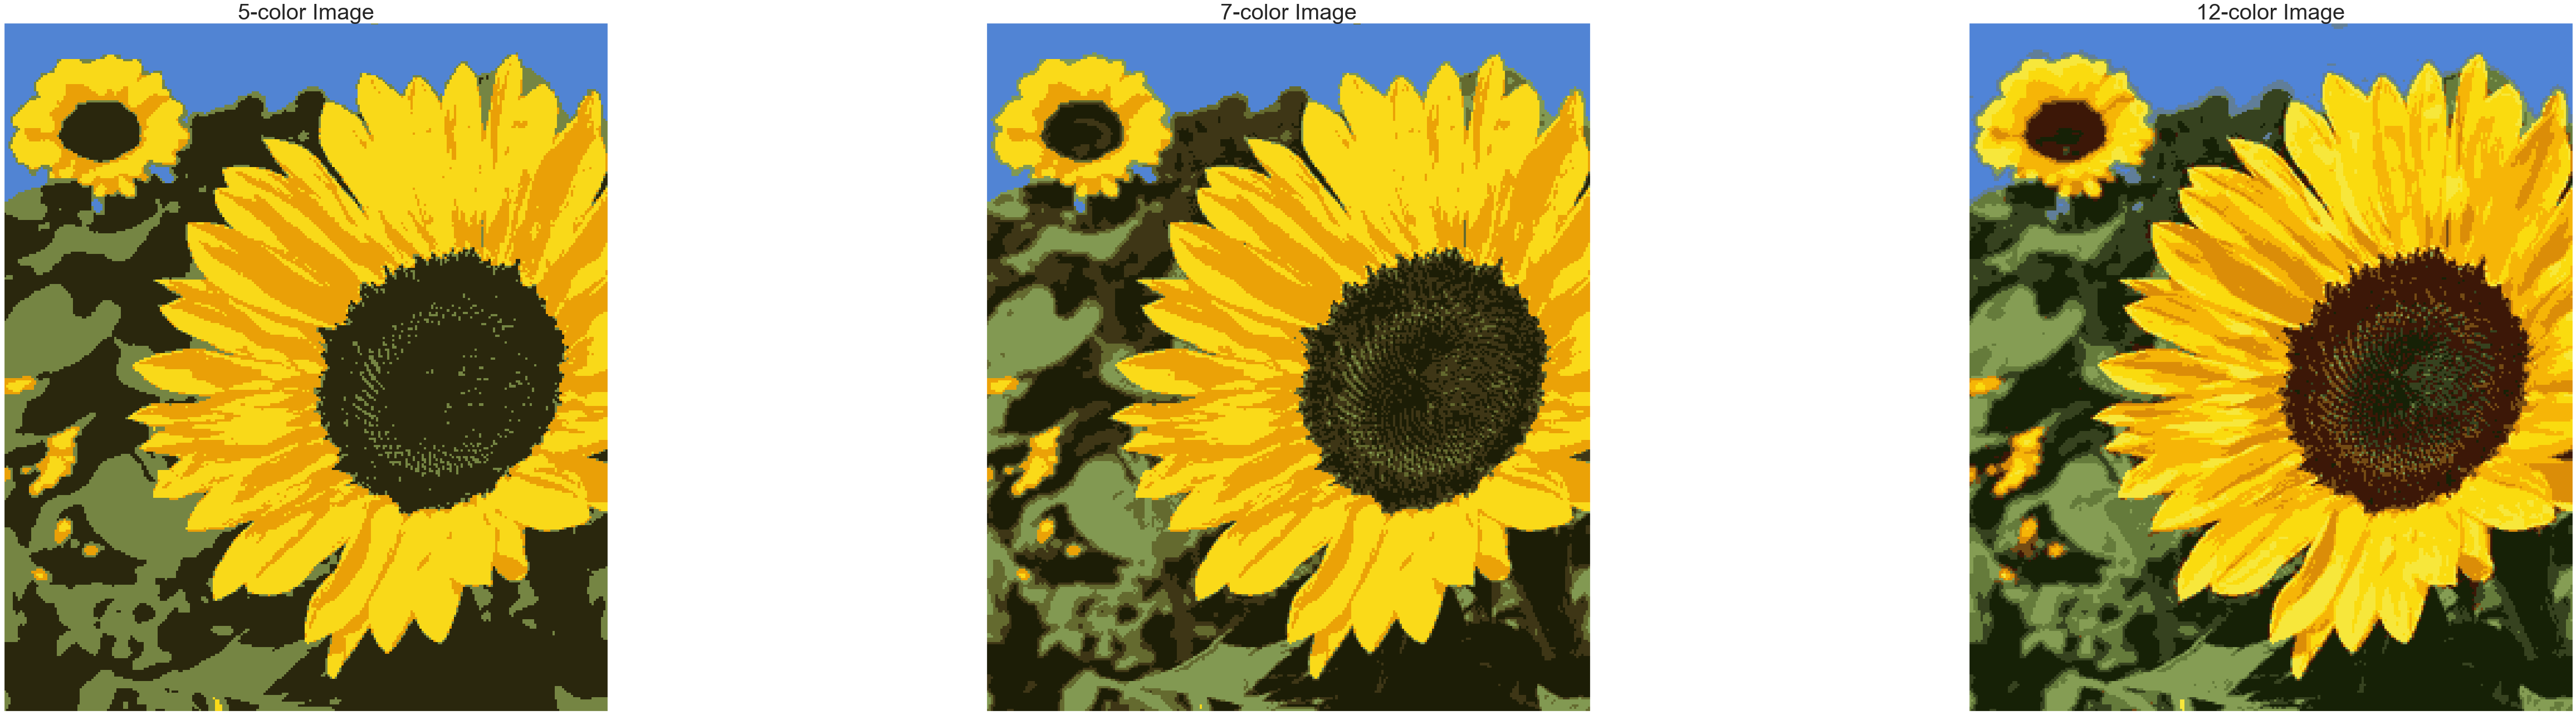

In [112]:
fig, ax = plt.subplots(1, 3, figsize=(80, 18), subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(five)
ax[0].set_title('5-color Image', size=40)
ax[1].imshow(seven)
ax[1].set_title('7-color Image', size=40)
ax[2].imshow(twelve)
ax[2].set_title('12-color Image', size=40)
plt.tight_layout()

We can see some stark differences between each picture. While the 12 color image contains brown in the middle of the flower, the 5 and 7 color images do not. Pretty cool to see how the number of colors changes the visual effect!

## Further Applications

In terms of data clustering, Kmeans is ideal for discovering globular clusters where all members of each cluster are in close proximity to each other because it uses Euclidean distance in its calculations. Points are clustered directly in their native data space. Spectral clustering, on the other hand, is a graph clustering technique (rather than data clustering) where a similarity matrix is formed - the (i,j)th entry is some similarity distance defined between the ith and jth data points in the dataset. I have not implemented it here, but it is particularly helpful for image processing since it uses Eigenvalues. 

A second application of Kmeans is with Breiman's Random Forest for unsupervised learning. This is done by constructing a joint distribution based on the independent variables that roughly describes the data. A simulation with a certain number of observations is created using this distribution. For example, if you have 1000 observations you could simulate 1000 more. Then you label them where 1 is real observation and 0 is a simulated observation. You can then run a regular random forest classifier to distinguish the real observations from the simulated ones. It is similar to KMeans because the proximity option must be turned on. The output is therefore a a description of proximity between your observations based on what Random Forest does when trying to assign these labels.